In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train_file = tf.keras.utils.get_file(
    'ratings_train.txt',
origin = 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
train = pd.read_csv(train_file, sep='\t')

In [4]:
print('train shape:', train.shape)
train.head()

train shape: (150000, 3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
cnt = train['label'].value_counts()
print(cnt)

label
0    75173
1    74827
Name: count, dtype: int64


<Axes: xlabel='label', ylabel='count'>

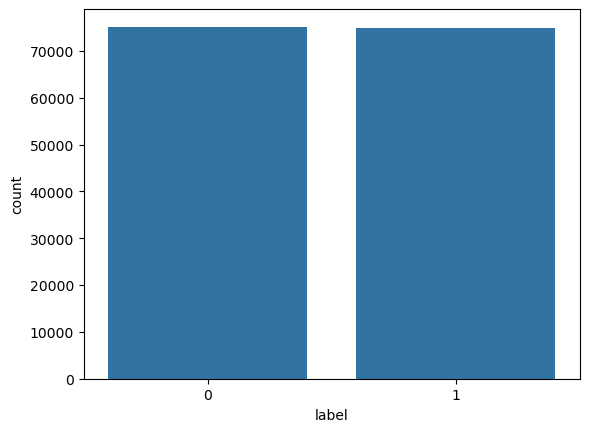

In [7]:
sns.countplot(x='label',data=train)

In [8]:
train.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [9]:
train[train['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


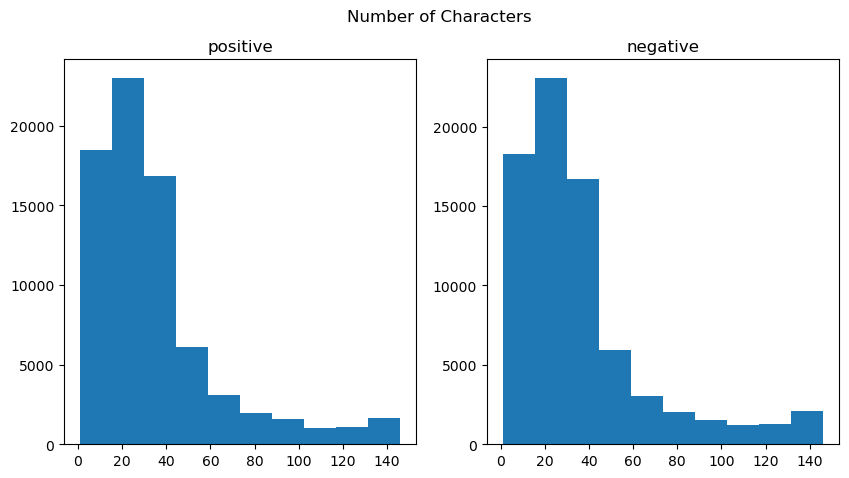

In [13]:
# 레이블별 텍스트 길이
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
data_len = train[train['label']==1]['document'].str.len()
ax1.hist(data_len)
ax1.set_title('positive')

data_len = train[train['label']==0]['document'].str.len()
ax2.hist(data_len)
ax2.set_title('negative')
fig.suptitle('Number of Characters')
plt.show()